In [12]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib
from sklearn.pipeline import make_pipeline

In [13]:
reviews_train = load_files("E:/II/aclImdb/train",encoding='utf-8')
text_train, y_train = reviews_train.data, reviews_train.target
print("Количество данных в обучающей выборке: %d" % len(text_train))

Количество данных в обучающей выборке: 25000


In [14]:
reviews_test = load_files("E:/II/aclImdb/test",encoding='utf-8')
text_test, y_test = reviews_test.data, reviews_test.target
print("Количество данных в тестовой выборке: %d" % len(text_test))

Количество данных в тестовой выборке: 25000


In [15]:
from sklearn.pipeline import make_pipeline

text_pipe = make_pipeline(CountVectorizer(), 
                                LogisticRegression(C = 0.1,n_jobs=-1, random_state=7))

text_pipe.fit(text_train, y_train)
print(text_pipe.score(text_test, y_test))

0.87904


In [16]:
joblib.dump(text_pipe, 'model_final.pkl')

['model_final.pkl']

In [17]:
class Model():
    def __init__(self):
        self.model = joblib.load( 'model_final.pkl')
    
    def result(self,X,y):
        return self.model.score(X,y)

In [18]:
model = Model()

In [19]:
u = list(map(int,np.linspace(0, y_test.shape[0],26)) )
u[-1] = u[-1] - 1

In [20]:
x = []
y = []
for i in u:
    x.append(y_test.shape[0] - i)
    y.append(model.result(text_test[i:], y_test[i:]) )

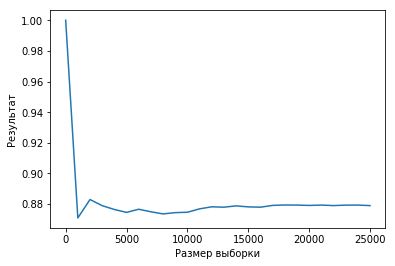

In [21]:
plt.plot(x,y)
plt.xlabel('Размер выборки')
plt.ylabel('Результат')
plt.show();

Вывод:
Модель с высокой точностью предсказывает результат
